# Sistemas Inteligentes

## Exercício Computacional 3 - Redução de Dimensionalidade e Regressão

### Identificação do Aluno

#### Nome Completo

    Jefferson Paiva de Paula

#### RA

    11201721192

## Instruções

Pesquise por datasets voltados para regressões que estejam disponíveis na biblioteca Scikit, então escolha um para este exercício.

Utilize algum método de redução de dimensionalidade para realizar tal processo, então gere três modelos de regressão com diferentes métodos (um método diferente para cada modelo).

Calcule e exiba métricas que ajudem a conferir a qualidade dos modelos gerados.

Exiba gráficos que auxiliem na visualização dos dados e da curva de regressão.

Compare os modelos e comente os resultados obtidos.

Insira as referências utilizadas ao final.

## Desenvolvimento

In [17]:
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA 
from sklearn.decomposition import FastICA
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

x=load_boston().data
y=load_boston().target

## PCA

score: 0.2312807285975781
msq: 53.7578545747984
r^2: 0.2312807285975781


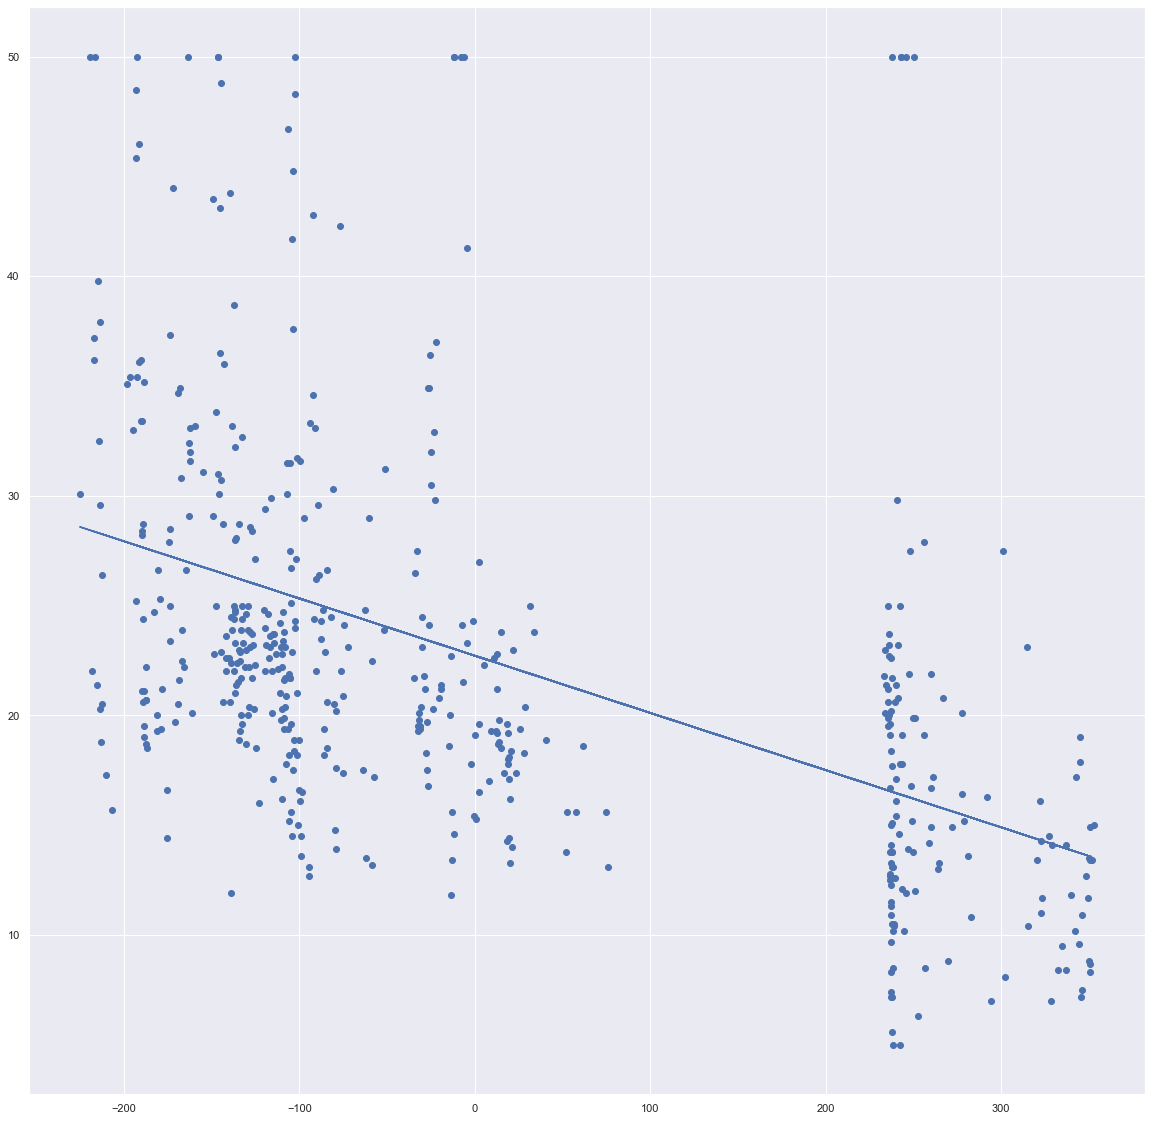

In [15]:
pca = PCA(n_components=1)
x_pca = pca.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x_pca, y,test_size=0.2)




reg_pca = LinearRegression()
reg_pca.fit(x_train,y_train)
reg_pred_pca = reg_pca.predict(x_test)



print("score:",reg_pca.score(x_test, y_test))
print("msq:", mean_squared_error(y_test, reg_pred_pca))
print("r^2:", r2_score(y_test, reg_pred_pca))
plt.figure(figsize=(20,20))
plt.scatter(x_pca, y)
plt.plot(x_test, reg_pred_pca)

### ISOMAP

score: 0.21009565070380043
msq: 56.245593971244915
r^2: 0.21009565070380043


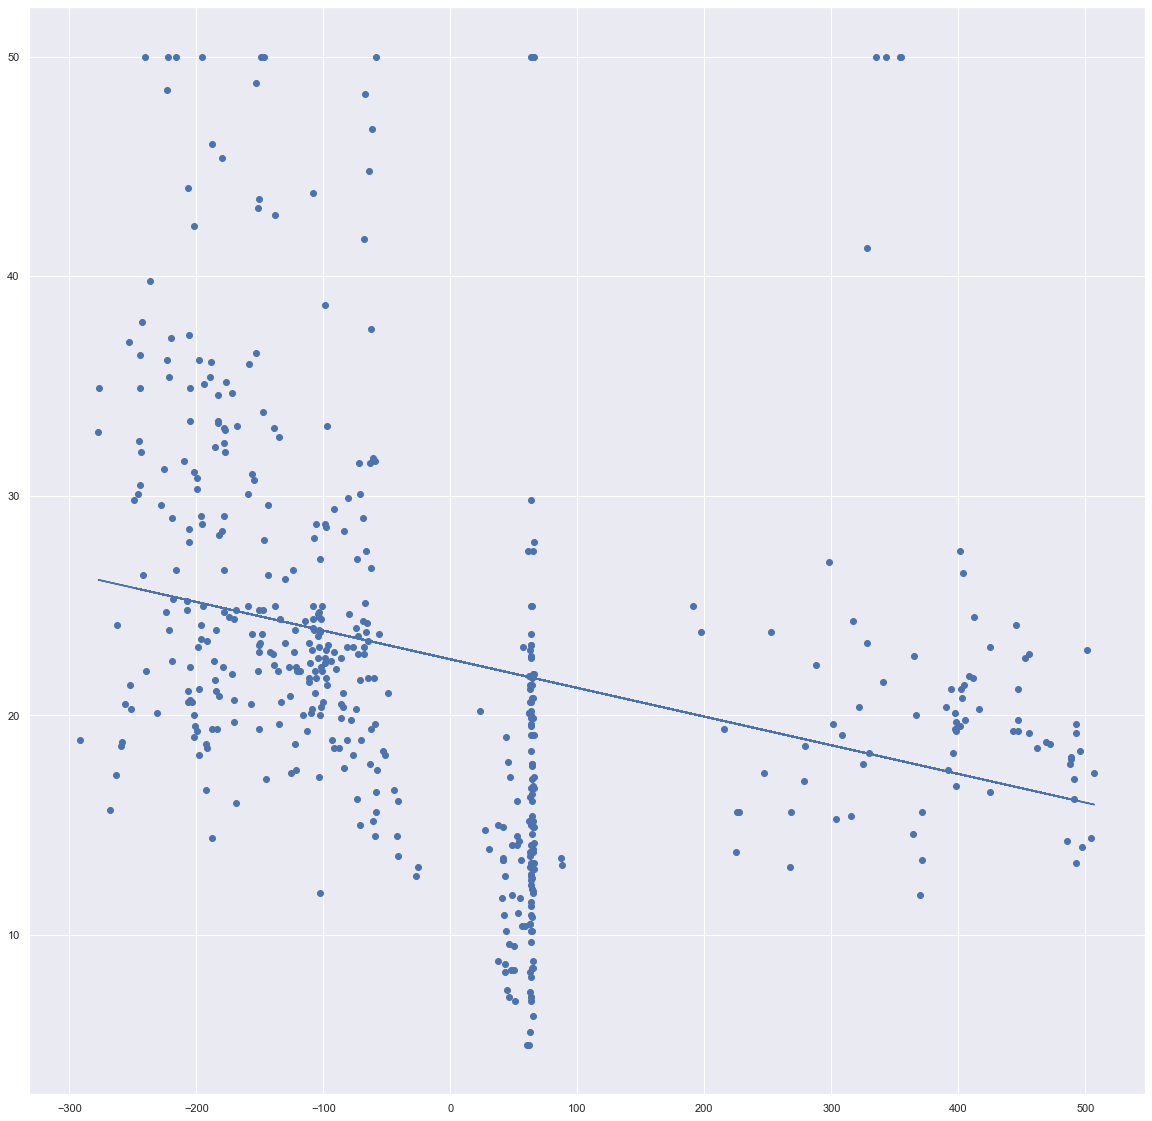

In [9]:
isomap=Isomap(n_components=1)
x_isomap=isomap.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x_isomap, y,test_size=0.2)

reg_isomap=LinearRegression()
reg_isomap.fit(x_train,y_train)
reg_pred_isomap = reg_isomap.predict(x_test)

print("score:",reg_isomap.score(x_test, y_test))
print("msq:", mean_squared_error(y_test, reg_pred_isomap))
print("r^2:", r2_score(y_test, reg_pred_isomap))
plt.figure(figsize=(20,20))
plt.scatter(x_isomap, y)
plt.plot(x_test, reg_pred_isomap)

### ICA

score: 0.2947369684142094
msq: 41.47809223963293
r^2: 0.2947369684142094


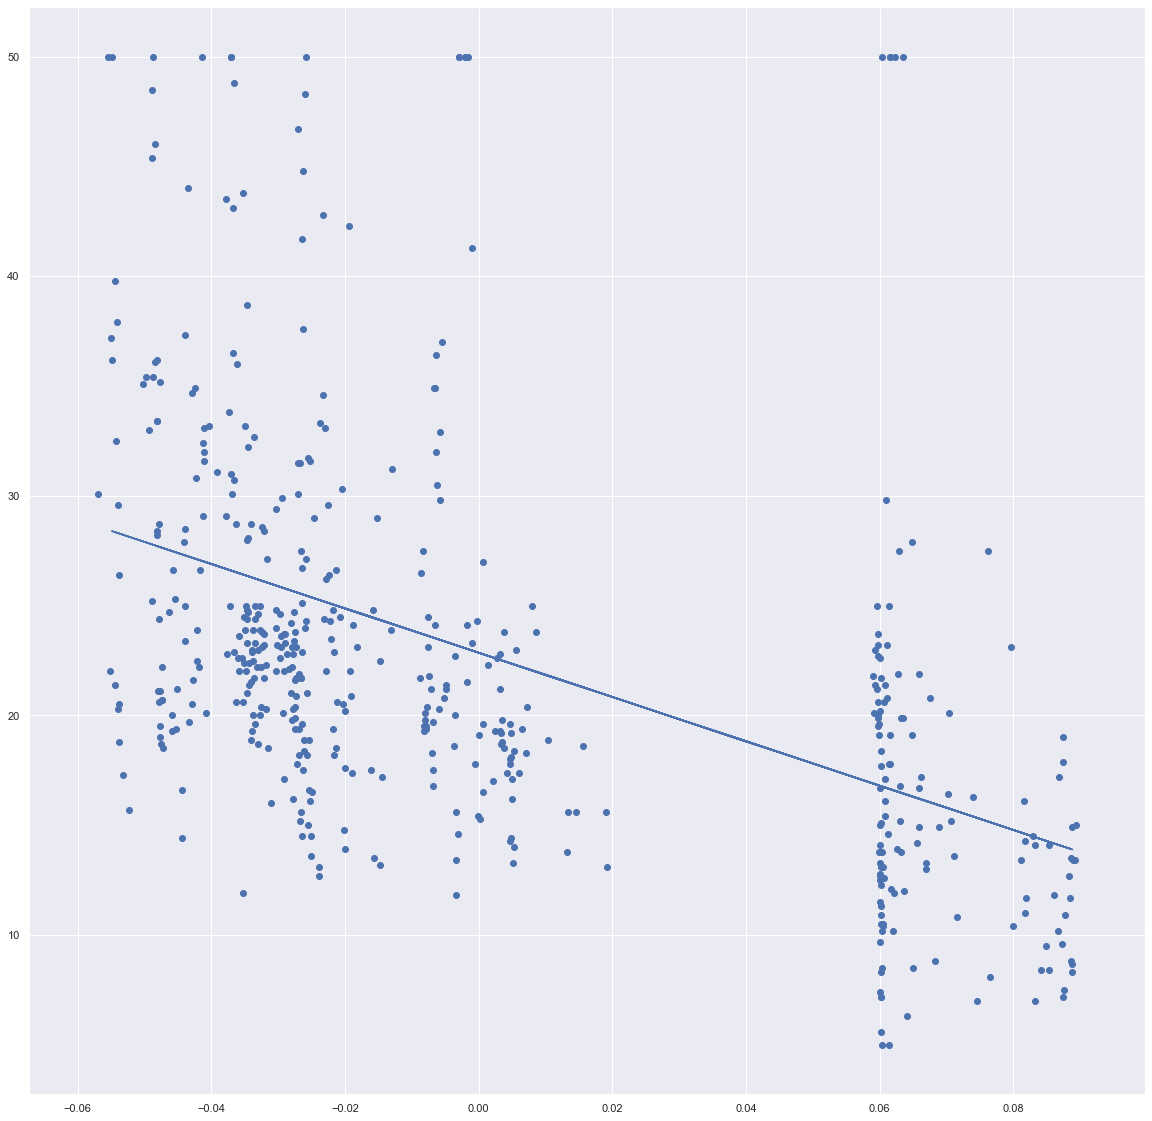

In [11]:
ica=FastICA(n_components=1)
x_ica=ica.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x_ica, y,test_size=0.2)

reg_ica = LinearRegression()
reg_ica.fit(x_train,y_train)
reg_pred_ica = reg_ica.predict(x_test)

print("score:",reg_ica.score(x_test, y_test))
print("msq:", mean_squared_error(y_test, reg_pred_ica))
print("r^2:", r2_score(y_test, reg_pred_ica))
plt.figure(figsize=(20,20))
plt.scatter(x_ica, y)
plt.plot(x_test, reg_pred_ica)

#### O modelo linear não parece ser adequado para a descrição do problema, os dados parecem estar distribuidos em 2 grandes clusters(para PCA/ICA) com uma região intermediária que não contem dados de transição. O modelo provavelmente deve se adequar melhor a uma regressão que consiga contemplar essa particularidade do conjunto de dados. O PCA e o ICA são métodos que valorizam dados com maior variância, tornando os dados mais divididos em conjuntos que podem ser vistos a esquerda e a direita .

#### O ISOMAP valoriza as menores distancias do conjunto de dados, sendo assim acaba valorizando dados que ocupam uma posição "central" do conjunto de dados

### REFERÊNCIA

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

https://scikit-learn.org/stable/modules/decomposition.html